# <span style="font-family: 'Times New Roman', serif;"> Redes neuronales </span>

<span style="font-family: 'Times New Roman', serif;">Se importan las librerías necesarias</span>

In [24]:
import pandas as pd
import numpy as np
import h5py
import os
import torch

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms

<span style="font-family: 'Times New Roman', serif;">Este código prepara un conjunto de datos de imágenes de frutas para su uso en un modelo de aprendizaje profundo (Se explica en que consiste el dataset)</span>

In [27]:
transform = transforms.Compose([
    transforms.Resize((320, 258)),  # Resize images to 320x258
    transforms.ToTensor(),  # Convert images to tensor format
])

current_dir = os.getcwd()
dataset_path = os.path.join(current_dir, 'dataset', 'Frutas', 'Train')

# Load the dataset
trainset = ImageFolder(root=dataset_path, transform=transform)

# Create a DataLoader to batch the data
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

# Example of accessing an image and its label
image, label = trainset[0]
print(f'Image shape: {image.shape}, Label: {label}')

#print(trainset.classes)

Image shape: torch.Size([3, 320, 258]), Label: 0


<span style="font-family: 'Times New Roman', serif;">Se usa <small> `transforms.Resize((320,258))` </small> para redimensionar las imagenes a un tamaño de 320x258 pixeles para asegurarse que todas tengan el mismo tamaño, posteriormente se convierten estas imagenes en tensores de PyTorch. </span>

<span style="font-family: 'Times New Roman', serif;">Usando <small>`os.getcwd`</small> accedemos al directorio donde se esta trabajando, posteriormente, con el comando <small>`os.path.join(current_dir, 'dataset', 'Frutas', 'Train')` </small> creamos una ruta al subdirectorio Train, el cual contiene las imagenes que se utilizaran para el entrenamiento del modelo.</span>

<span style="font-family: 'Times New Roman', serif;"> Se utiliza<small> `ImageFolder(root=dataset_path,transform=transform)` </small> para cargar cargar el dataset, ya que esta estructurado en carpetas, se espera que cada subcarpeta en <small>`dataset_path`</small> contenga imagenes que pertenecen a una clase especifica de un tipo de fruta.

<span style="font-family: 'Times New Roman', serif;">El <small>`trainloader`</small> fue creado con un lote de 64 imagenes, con <small>`shuffle=True`</small>, lo cual le dice que mezcle el conjunto de datos cada vez que comenzamos a revisar el dataloader nuevamente. </span>

<span style="font-family: 'Times New Roman', serif;">Posteriormente se accede a la primera imagen en el conjunto de entranamiento, posteriormente se imprime el canal, sus dimensiones y la etiqueta, la cual representa la clase a la que pertenece la imagen.</span>

<span style="font-family: 'Times New Roman', serif;"><small> `Image shape: torch.Size([3, 320, 258]), Label: 0`</small>: Tiene 3 canales, lo cual indica que es RGB, es decir, a color; 320 es el alto; 250 es el ancho y 0 es la clase a la que pertenece, que en este caso es LA CLASE </span>


In [4]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


<span style="font-family: 'Times New Roman', serif;">Configura el entorno de visualización para facilitar la proyeción de datos.</span>

In [5]:
#Baches de 64 imágenes de 3 canales (RGB) de tamaño 320x258
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 3, 320, 258])
torch.Size([64])


<span style="font-family: 'Times New Roman', serif;">En <small>`dataiter`</small> se crea un iterador a partir del trainloader, lo que permite acceder a los datos de forma secuencial. </span>

<span style="font-family: 'Times New Roman', serif;"> Posteriormente se obtienen los datos del siguiente lote, donde retornan un lote de imagenes y sus respectivas etiquetas</span>

<span style="font-family: 'Times New Roman', serif;"> Se imprime el tipo de variable de las imagenes, el cual es un <small>`torch.Tensor`</small>. Adicionalmente, se imprime la forma del tensor de imagenes <small>`torch.Size([64, 3, 320, 258])`</small> *(lote=64, canales=3, alto=320, ancho=258)* y finalmente se imprime la forma del tensor que contiene las etiquetas <small>`torch.Size([64])`</small>, debido a que cada imagen tiene una etiqueta unica, retorna la cantidad del lote (64)</span>

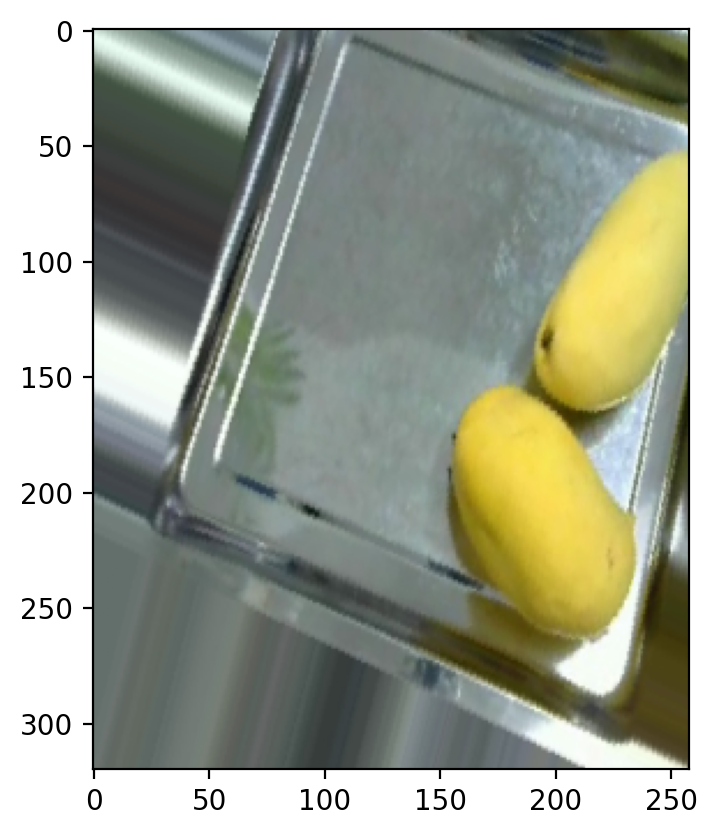

In [6]:
plt.imshow(images[2].numpy().transpose(1, 2, 0))  # Reordenamos los ejes para que sea interpretable por imshow
plt.show()

<span style="font-family: 'Times New Roman', serif;"> Se accede a la tercera imagen del lote, y esta se convierte de un tensor a un array, ya que imshow espera un array de Numpy, posteriormente se reordenan los ejes y se muestra la imagen seleccionada.</span>

In [7]:
#Todas las instancias de 784 se reemplazan por 247680 (3x320x258)
def activation(x):
  return 1/(1+torch.exp(-x))

# Flatten the input images
inputs = images.view(images.shape[0], -1)

# Create parameters
w1 = torch.randn(247680, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 5)
b2 = torch.randn(5)

h = activation(torch.mm(inputs, w1) + b1)

out = activation(torch.mm(h, w2) + b2)

<span style="font-family: 'Times New Roman', serif;"> Se define la funcion de activacion, la cual es la sigmoide</span>

<span style="font-family: 'Times New Roman', serif;"> Se aplanan las imagenes, y posteriormente se crean los parametros de la red: </span>

<span style="font-family: 'Times New Roman', serif;"><small>`w1:`</small> Primera capa, donde se concectan las entradas *(247680)* con las 256 neuronas en la capa oculta</span>

<span style="font-family: 'Times New Roman', serif;"> <small>`b1:`</small> Bias de la primera capa</span>

<span style="font-family: 'Times New Roman', serif;"><small>`w2:`</small> Segunda capa, donde conecta las 256 neuronas de la capa oculta con la capa de salida, la cual tiene un valor de 5, que es la cantidad de clases.</span>

<span style="font-family: 'Times New Roman', serif;"><small>`b2:`</small> Bias de la segunda capa</span>

<span style="font-family: 'Times New Roman', serif;"><small>`h:`</small> Se realiza un multiplicacion matricial entre las entradas y los pesos de la primera capa, posteriormente se le suma el sesgo y finalmente se pasa el resultado por la funcion de activacion sigmoide</span>

<span style="font-family: 'Times New Roman', serif;"><small>`out:`</small> Se realiza lo mismo que en el anterior paso, pero esta vez las entradas es el valor obtenido en <small>`h`</small>, el resultado retornado es la probabilidad de cada una de las 5 clases para cada una de las 64 imagenes del lote.</span>

In [8]:
def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

probabilities = softmax(out)

# Does it have the right shape? Should be (64, 5)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 5])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


<span style="font-family: 'Times New Roman', serif;">Se define la funcion <small>'softmax'</small>, posteriormente esta es aplicada al tensor <small>`out`</small>, la cual es la salida del modelo definida anteriormente, luego se imprime la forma del tensor, la cual es <small>`torch.Size([64, 5])`</small> donde se espera que las probabilidades para 64 imagenes con 5 posibles casos, y finalemente se asegura que la suma para cada columna sume 1.</span>

In [9]:
from torch import nn

<span style="font-family: 'Times New Roman', serif;"> Se importa el modulo <small>`nn`</small></span>

In [10]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    
    # Inputs to hidden layer linear transformation
    self.hidden = nn.Linear(247680, 256)
    # Output layer, 5 units
    self.output = nn.Linear(256, 5)
    
    # Define sigmoid activation and softmax output 
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim=1)
      
  def forward(self, x):
    # Pass the input tensor through each of our operations
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    x = self.softmax(x)
    
    return x

<span style="font-family: 'Times New Roman', serif;">Esta red neuronal tiene una capa oculta de 256 neuronas, usa la función de activación <small>`sigmoide`</small> en la capa oculta, la cual implementa la no linealidad y la función <small>`softmax`</small> en la capa de salida para realizar la clasificación de imagenes en 5 clases.</span>

In [11]:
model = Network()
model

Network(
  (hidden): Linear(in_features=247680, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=5, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

<span style="font-family: 'Times New Roman', serif;"> Se crea una instancia del modelo Network y muestra una representacion de la red neuronal, donde esta presente el nombre de la red *(network)*, la primera capa *(hidden)*, la segunda capa *(output)*, la funcion de activacion usada depues de la capa oculta *(sigmoid)* y la funcion de activacion usada en la capa de salida *(softmax)*.</span>

In [12]:
import torch.nn.functional as F

<span style="font-family: 'Times New Roman', serif;">Se importa una libreria necesaria</span>

In [13]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    # Inputs to hidden layer linear transformation
    self.hidden = nn.Linear(247680, 256)
    # Output layer, 5 units
    self.output = nn.Linear(256, 5)
      
  def forward(self, x):
    # Hidden layer with sigmoid activation
    x = F.sigmoid(self.hidden(x))
    # Output layer with softmax activation
    x = F.softmax(self.output(x), dim=1)
    
    return x

In [14]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    # Defining the layers, 128, 64, 10 units each
    self.fc1 = nn.Linear(247680, 128)
    self.fc2 = nn.Linear(128, 64)
    # Output layer, 10 units - one for each digit
    self.fc3 = nn.Linear(64, 5)
      
  def forward(self, x):
    ''' Forward pass through the network, returns the output logits '''
    
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)
    x = F.softmax(x, dim=1)
    
    return x

model = Network()
model

Network(
  (fc1): Linear(in_features=247680, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=5, bias=True)
)

In [15]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[ 1.0217e-03,  5.1845e-04,  5.2077e-04,  ..., -7.7908e-04,
         -3.6593e-04,  1.7218e-03],
        [ 1.1273e-03,  3.2129e-04,  7.3984e-04,  ...,  6.8501e-05,
         -6.6236e-04, -7.8900e-05],
        [-1.0996e-04, -8.2336e-04, -9.6796e-04,  ...,  3.6227e-04,
         -1.0077e-03, -1.7045e-03],
        ...,
        [-9.7741e-04,  5.8325e-04,  1.5395e-03,  ...,  7.0872e-04,
          8.8536e-04, -1.9363e-03],
        [-4.8095e-04,  1.9749e-03,  1.7105e-03,  ...,  6.1083e-04,
         -3.5798e-04,  1.3965e-03],
        [-4.1645e-04,  1.3670e-03,  1.0984e-04,  ..., -1.3104e-03,
          1.0485e-03,  1.6215e-03]], requires_grad=True)
Parameter containing:
tensor([ 4.3168e-05, -1.6813e-03,  2.0078e-03,  1.7007e-03, -1.7618e-03,
         8.0496e-04, -1.7473e-03,  9.7616e-04, -5.6615e-04, -1.7713e-04,
         1.0042e-03, -3.8495e-04,  1.9047e-03, -2.6582e-04, -3.3057e-04,
        -1.3744e-03, -1.6616e-03, -1.3273e-03, -1.0051e-03, -6.7192e-04,
        -1.3

In [16]:
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
model.fc1.weight.data.normal_(std=0.01)

tensor([[ 0.0041,  0.0026,  0.0076,  ...,  0.0042, -0.0036,  0.0053],
        [ 0.0003,  0.0021,  0.0024,  ...,  0.0031, -0.0103,  0.0002],
        [ 0.0076,  0.0050, -0.0058,  ..., -0.0166, -0.0020,  0.0077],
        ...,
        [ 0.0055,  0.0050,  0.0032,  ..., -0.0072,  0.0029,  0.0026],
        [ 0.0097,  0.0121,  0.0163,  ...,  0.0137, -0.0053, -0.0080],
        [ 0.0101,  0.0081, -0.0136,  ..., -0.0143,  0.0113,  0.0116]])

In [18]:
def view_classify(img, ps):
  ps = ps.data.numpy().squeeze()
  fig, (ax1, ax2) = plt.subplots(figsize=(10,13), ncols=2)
  ax1.imshow(img.numpy().transpose((1, 2, 0)))
  ax1.axis('off')
  ax2.barh(np.arange(5), ps)
  ax2.set_aspect(0.1)
  ax2.set_yticks(np.arange(5))
  ax2.set_yticklabels(['Banano', 'Granada', 'Kiwi', 'Mango', 'Pitaya'], size='medium');
  ax2.set_title('Class Probability')
  ax2.set_xlim(0, 1.1)

  plt.tight_layout()

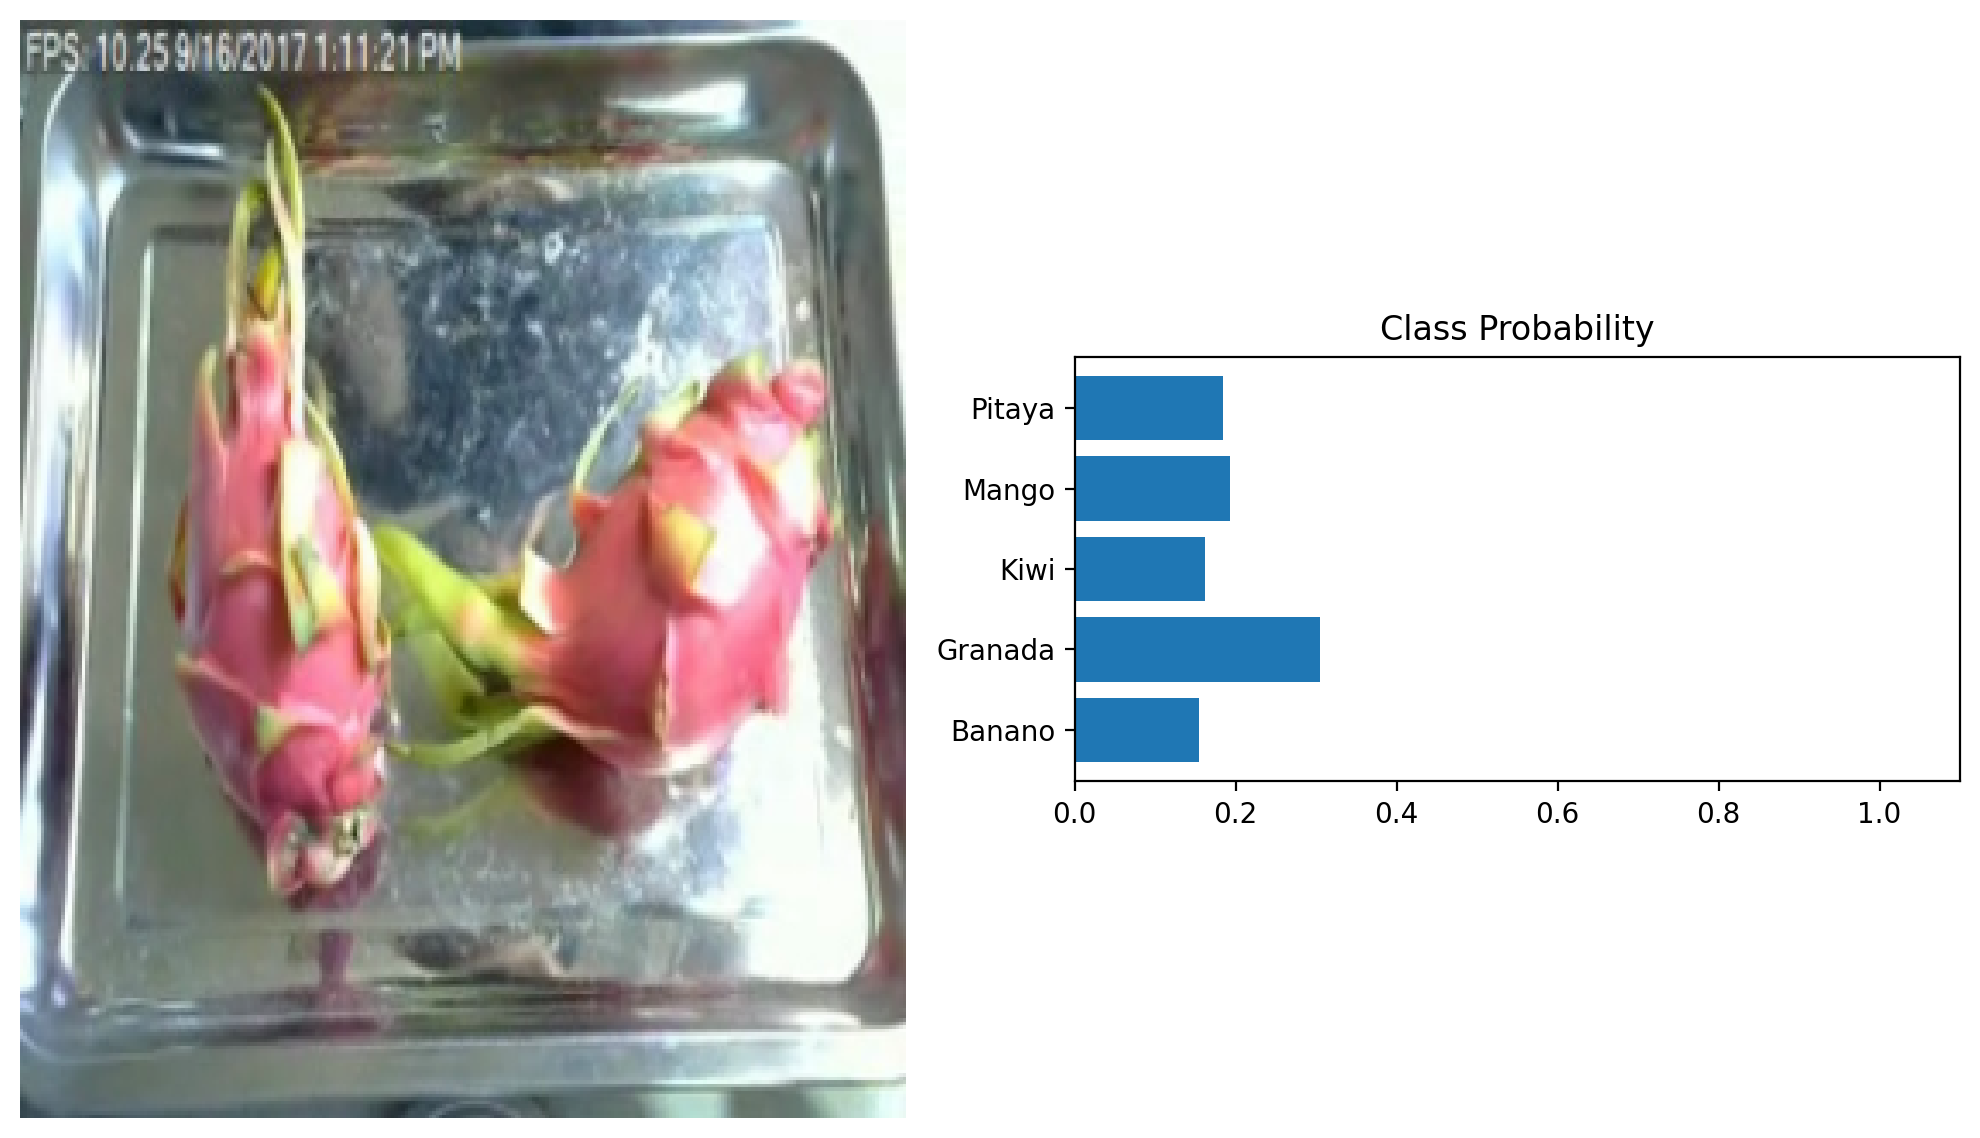

In [19]:
# Grab some data 
dataiter = iter(trainloader)  # Asegúrate de usar el `train_loader` correcto para tu dataset
labels = next(dataiter)
images = images.view(images.shape[0], -1)

# No es necesario redimensionar las imágenes, ya que se mantienen en su formato original
# (batch_size, color_channels, height, width) ya es (batch_size, 3, 320, 258)
# Forward pass a través de la red
img_idx = 0  # Puedes cambiar el índice para ver otras imágenes
ps = model.forward(images[img_idx,:].unsqueeze(0))  # Asegúrate de agregar un batch dimension con unsqueeze(0)

# Obtener la imagen y mostrarla con las probabilidades
img = images[img_idx]
view_classify(img.view(3, 320, 258), ps)

Sequential(
  (0): Linear(in_features=247680, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=5, bias=True)
  (5): Softmax(dim=1)
)


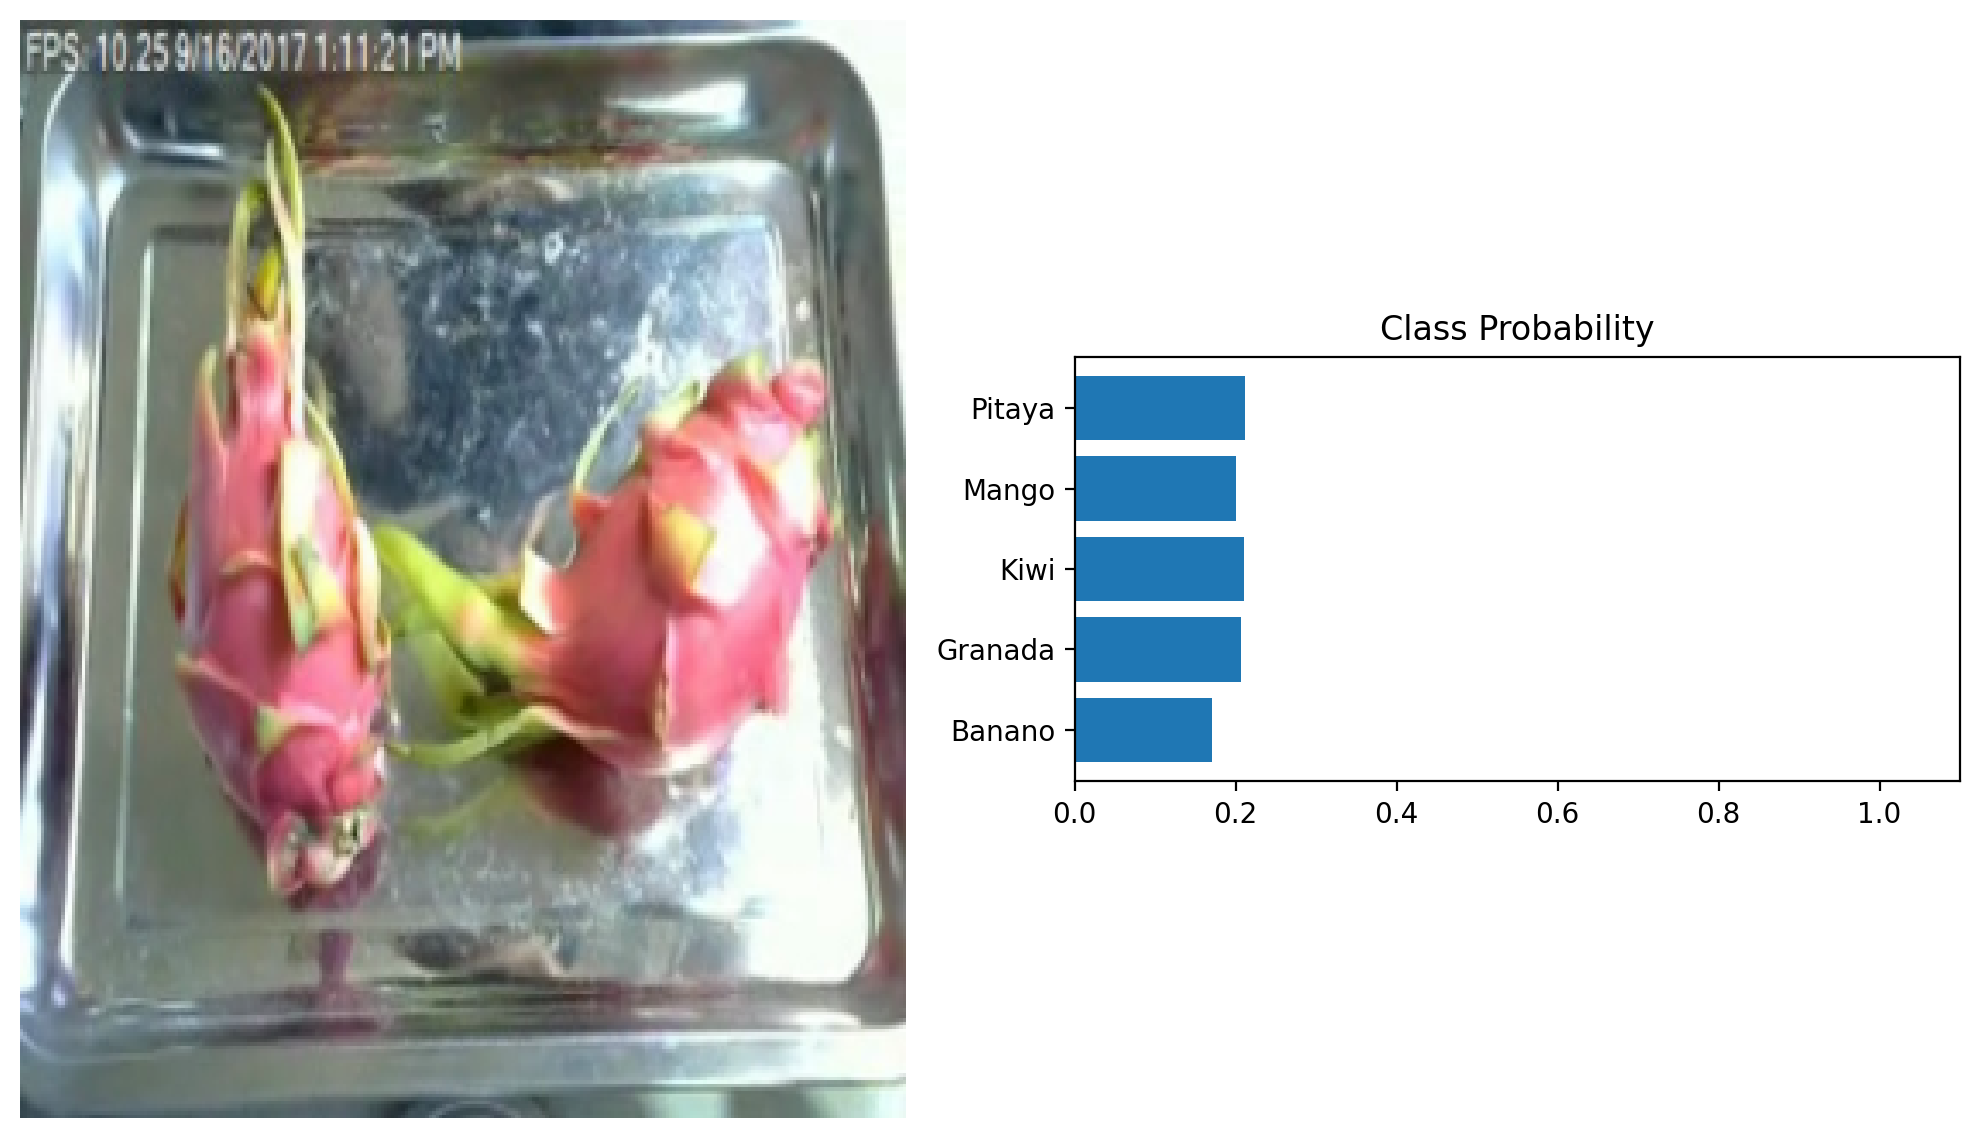

In [20]:
# Hyperparameters for our network
input_size = 247680
hidden_sizes = [128, 64]
output_size = 5

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
#images.resize_(images.shape[0], 3, 247680)
ps = model.forward(images[0,:].unsqueeze(0))
view_classify(images[0].view(3, 320, 258), ps)

In [21]:
print(model[0])
model[0].weight

Linear(in_features=247680, out_features=128, bias=True)


Parameter containing:
tensor([[-8.1799e-05,  2.3502e-04,  1.4805e-03,  ...,  8.1921e-04,
          5.4546e-04,  1.4112e-03],
        [-1.1344e-04, -3.2121e-04, -7.0329e-04,  ...,  1.9432e-03,
         -1.5294e-03, -6.6721e-04],
        [ 1.0608e-03, -3.7126e-04, -7.8744e-04,  ..., -1.0668e-03,
          1.6834e-03,  1.9457e-03],
        ...,
        [-1.5929e-03,  1.4785e-04,  1.4966e-04,  ..., -1.0311e-03,
         -1.8374e-04, -1.3747e-03],
        [ 7.7637e-04,  2.6463e-04, -1.3243e-03,  ...,  3.7132e-04,
         -1.0834e-03, -1.5265e-03],
        [ 1.7270e-03,  4.5873e-04,  8.9944e-04,  ...,  2.8488e-04,
         -1.0767e-03,  5.0229e-04]], requires_grad=True)

In [22]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=247680, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=5, bias=True)
  (softmax): Softmax(dim=1)
)

In [23]:
print(model[0])
print(model.fc1)

Linear(in_features=247680, out_features=128, bias=True)
Linear(in_features=247680, out_features=128, bias=True)
